In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import (Descriptors,
    Lipinski, QED, Draw, AllChem)
from kinfraglib import utils
import matplotlib.pyplot as plt
import seaborn as sns
import utils_eval


Read molecules to dataframe

In [2]:
# read data
data = utils_eval.read_mols('../cluster_results/3amb18092023/3amb/results.sdf')
data['inchi'] = data.apply(lambda x: Chem.MolToInchi(utils.standardize_mol(x.ROMol)), axis=1)
data['has_no_chiral_centre'] = data.apply(lambda x: len(Chem.FindMolChiralCenters(utils.standardize_mol(x.ROMol), includeUnassigned=True, useLegacyImplementation=False)) == 0, axis=1)
data['binding_affinity'] = data.apply(lambda x: (x['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM]'] + x['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'])/2, axis=1)
data.head()

,ROMol,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM],BIOSOLVEIT.LOGP,BIOSOLVEIT.MOLECULAR_WEIGHT,BIOSOLVEIT.TPSA,fragment_ids,smiles_ligand,smiles_fragments_dummy,smiles_fragments,BIOSOLVEIT.DOCKING_SCORE,filtered,num_fragments,inchi,has_no_chiral_centre,binding_affinity
0,"<img data-content=""rdkit/molecule"" src=""data:i...",0.145501,14.456369,4.44350,352.436,64.10,"{'AP': 345, 'SE': 114}",COc1ccc(OC)c(-c2cc(Nc3cc(C4CCC4)[nH]n3)n(C)c2)c1,"{'AP': 'Nc1cc(C2CCC2)[nH]n1', 'SE': '[30*]c1cc...","{'AP': '[22*]Nc1cc(C2CCC2)[nH]n1', 'SE': 'COc1...",120.78,0,2,InChI=1S/C20H24N4O2/c1-24-12-14(16-10-15(25-2)...,True,7.300935
1,"<img data-content=""rdkit/molecule"" src=""data:i...",0.185049,18.385735,2.89520,408.446,86.42,"{'AP': 345, 'SE': 149}",O=C(NC1CC[NH2+]CC1)c1cc(Nc2cc(C3CCC3)[nH]n2)cc...,"{'AP': 'Nc1cc(C2CCC2)[nH]n1', 'SE': '[34*]c1cc...","{'AP': '[22*]Nc1cc(C2CCC2)[nH]n1', 'SE': 'O=C(...",133.54,0,2,"InChI=1S/C20H24F3N5O/c21-20(22,23)14-8-13(19(2...",True,9.285392
2,"<img data-content=""rdkit/molecule"" src=""data:i...",0.219514,21.810011,1.57070,369.486,83.62,"{'AP': 79, 'SE': 113}",O=C(NCc1ccc(OCC2CC[NH2+]CC2)cc1)c1n[nH]c2c1CCCC2,"{'AP': 'CNC(=O)c1n[nH]c2c1CCCC2', 'SE': '[12*]...",{'AP': '[22*][C@@H]1CCc2[nH]nc(C(=O)NC[27*])c2...,393.87,0,2,InChI=1S/C21H28N4O2/c26-21(20-18-3-1-2-4-19(18...,True,11.014762
3,"<img data-content=""rdkit/molecule"" src=""data:i...",0.236819,23.529323,4.05340,338.409,64.10,"{'AP': 5, 'SE': 114}",COc1ccc(OC)c(-c2cc(Nc3cc(C4CC4)[nH]n3)n(C)c2)c1,"{'AP': 'Nc1cc(C2CC2)[nH]n1', 'SE': '[30*]c1cc(...","{'AP': '[17*]Nc1cc(C2CC2)[nH]n1', 'SE': 'COc1c...",-8.60,0,2,InChI=1S/C19H22N4O2/c1-23-11-13(15-9-14(24-2)6...,True,11.883071
4,"<img data-content=""rdkit/molecule"" src=""data:i...",0.243479,24.191076,2.45132,314.387,90.04,"{'AP': 345, 'SE': 306}",Cc1ccc(C(=O)NCCO)cc1Nc1cc(C2CCC2)[nH]n1,"{'AP': 'Nc1cc(C2CCC2)[nH]n1', 'SE': '[16*]c1cc...","{'AP': '[22*]Nc1cc(C2CCC2)[nH]n1', 'SE': 'Cc1c...",1012.02,0,2,InChI=1S/C17H22N4O2/c1-11-5-6-13(17(23)18-7-8-...,True,12.217277


In [8]:
print(f"Compounds with no chiral centre: {sum(data['has_no_chiral_centre'])}")

Compounds with no chiral centre: 17487


In [3]:
data_without_chrial_centre = data[data['has_no_chiral_centre']].reset_index(drop=True)

## Number of generated compounds

In [4]:
print(f"Total number of compounds: {data.index.size}")
print(f"Post-filter --->")
data_post_filtered = data[data['binding_affinity'] <= 1000].copy() 
print(f"Number of compounds with binidng affinity higher than or equal 1000 nM: {data_post_filtered.index.size}")
for unique_val in pd.unique(data_post_filtered['num_fragments']):
    print(f"Number of ligands comprising {unique_val} fragments: {sum(x == unique_val for x in data_post_filtered['num_fragments'])}")

print(f'Number of compounds with bindinda affinity less than 100nM: {sum(data["binding_affinity"] < 100)}')

Total number of compounds: 31083
Post-filter --->
Number of compounds with binidng affinity higher than or equal 1000 nM: 9599
Number of ligands comprising 2 fragments: 976
Number of ligands comprising 3 fragments: 8301
Number of ligands comprising 4 fragments: 322
Number of compounds with bindinda affinity less than 100nM: 7447


In [11]:
print(f'Removed {100-data_post_filtered.index.size/data.index.size * 100} compounds (noise)')

Removed 69.1181674870508 compounds (noise)


## Molecular properties

### Affinity

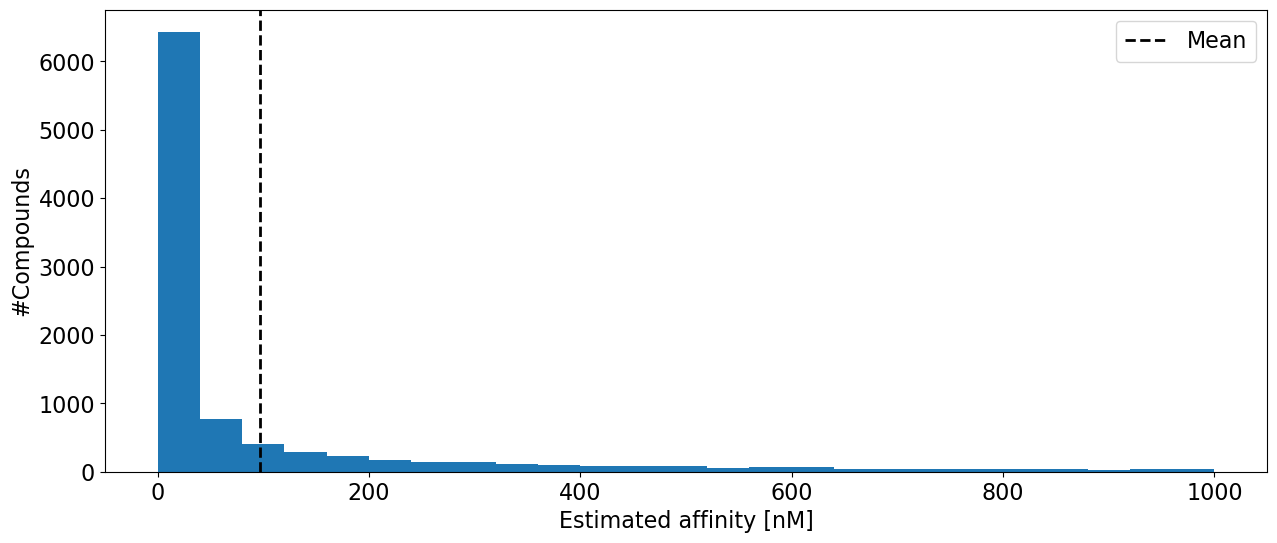

In [5]:
plt.figure(figsize=(15, 6))
plt.hist(data_post_filtered.binding_affinity, bins=25)
plt.ylabel("#Compounds", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Estimated affinity [nM]', fontsize=16)
mean_line = plt.axvline(data_post_filtered.binding_affinity.mean(), color='k', linestyle='dashed', linewidth=2, label="Mean")
plt.legend(handles = [mean_line], fontsize=16)

In [6]:
print(f"Statistics of binding affinity (post-filtered): \n{data_post_filtered['binding_affinity'].describe()}")
print(f"Estimated binding affinity [nM] median: {data_post_filtered['binding_affinity'].median()}")

Statistics of binding affinity (post-filtered): 
count    9599.000000
mean       96.529083
std       189.308090
min         0.002951
25%         2.916896
50%        12.442623
75%        79.057674
max       999.993821
Name: binding_affinity, dtype: float64
Estimated binding affinity [nM] median: 12.442623


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

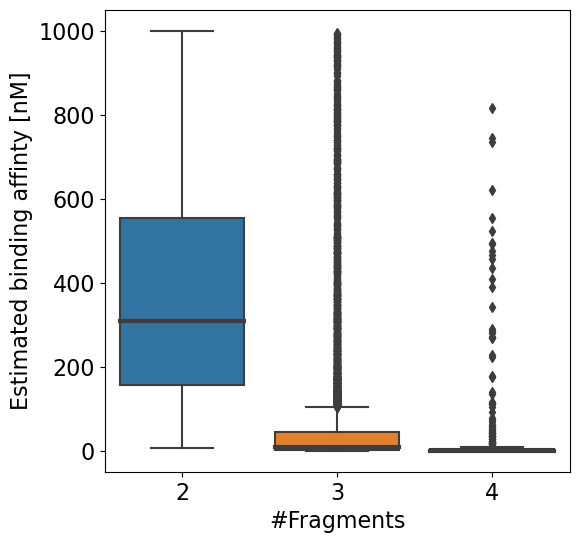

In [7]:
# binding affinity per subpocket
plt.figure(figsize=(6, 6))

bp = sns.boxplot(
x="num_fragments",
y='binding_affinity',
data=data_post_filtered,
medianprops={"linewidth": 3, "linestyle": "-"},
)
plt.ylabel("Estimated binding affinty [nM]", fontsize=16)
plt.xlabel("#Fragments", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

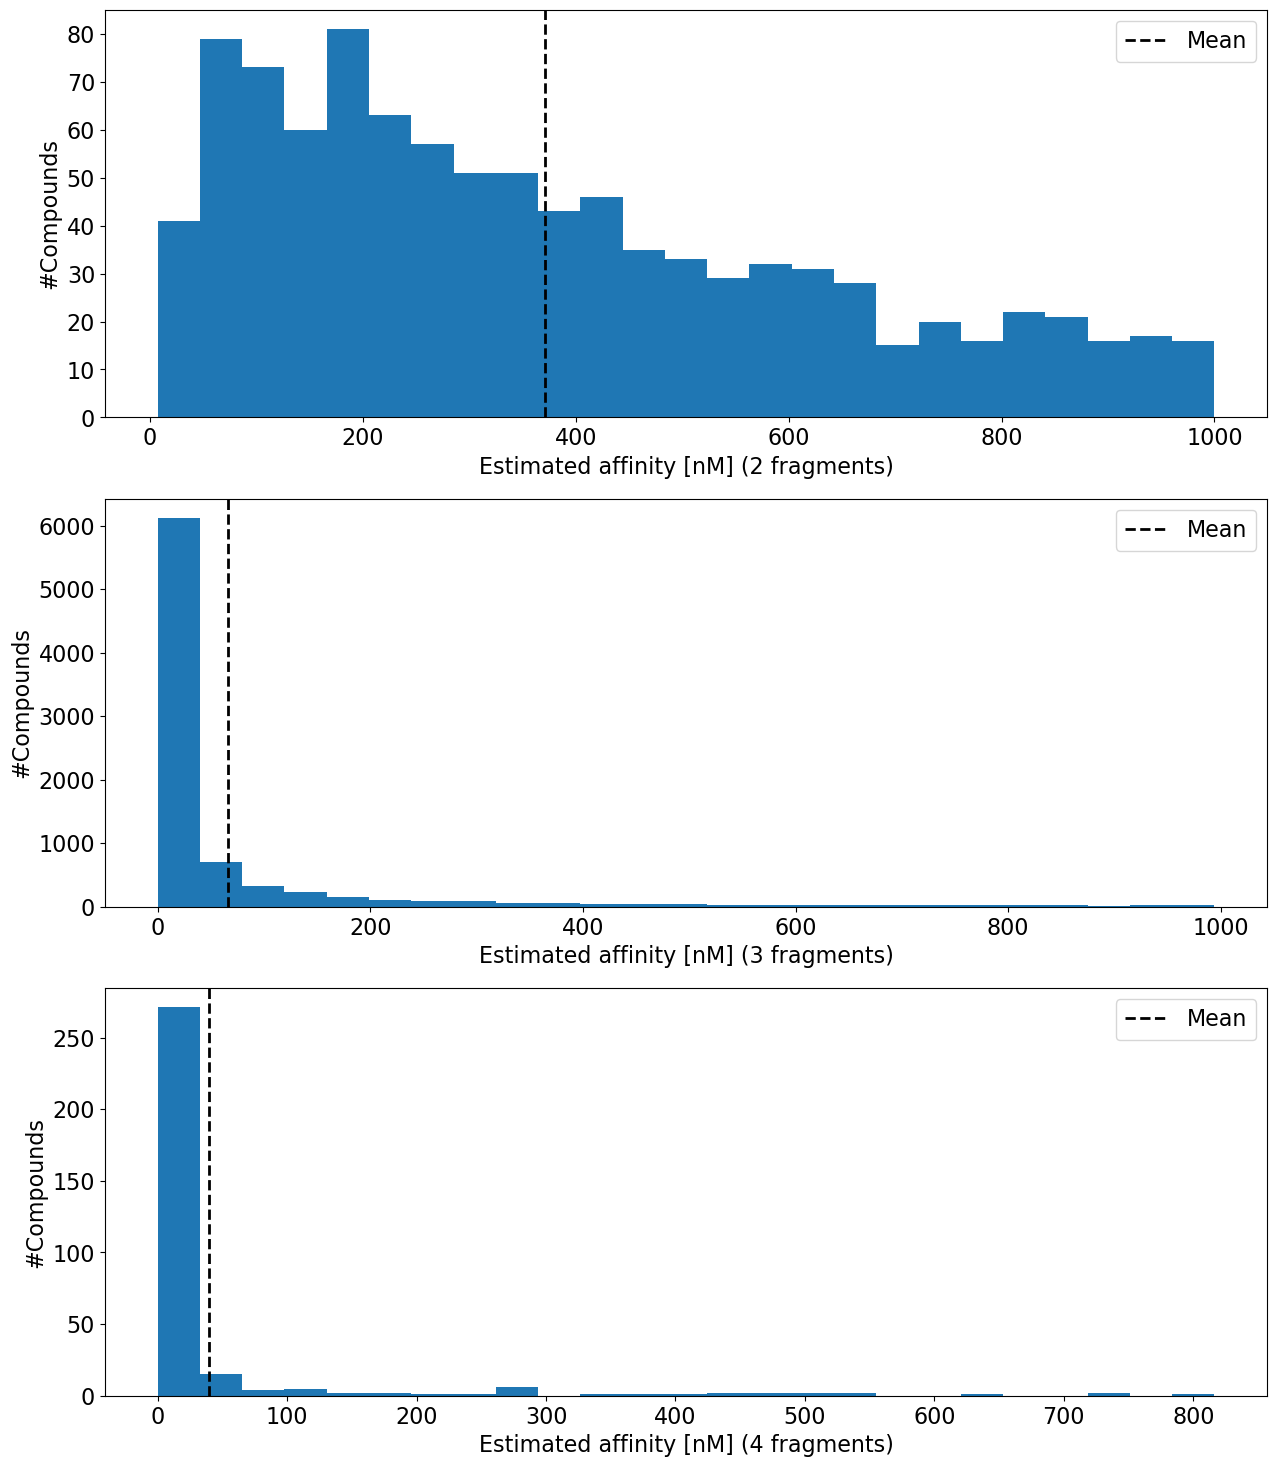

In [8]:
plt.rc('font', size=16) 
fig, axis = plt.subplots(3, 1, figsize=(15, 18))
descriptors = range(2, 5)
for i, descriptor_name in enumerate(descriptors):
        x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].binding_affinity
        axis[i].hist(x, bins=25)
        axis[i].set(ylabel="#Compounds", xlabel=f"Estimated affinity [nM] ({descriptor_name} fragments)")
        line = axis[i].axvline(x.mean(), color='k', linestyle='dashed', linewidth=2, label = f"Mean")
        axis[i].legend(handles = [line], fontsize=16)

In [27]:
for descriptor_name in range(2, 5):
    x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].binding_affinity
    print(f'Binding Affinity stats. of compounds with {descriptor_name} fragments:\n{x.describe()}')

Binding Affinity stats. of compounds with 2 fragments:
count    976.000000
mean     370.925427
std      259.069168
min        7.300935
25%      157.467663
50%      309.644343
75%      553.254733
max      999.993821
Name: binding_affinity, dtype: float64
Binding Affinity stats. of compounds with 3 fragments:
count    8301.000000
mean       66.472594
std       151.984928
min         0.014789
25%         2.762185
50%         9.677096
75%        43.479300
max       993.990042
Name: binding_affinity, dtype: float64
Binding Affinity stats. of compounds with 4 fragments:
count    322.000000
mean      39.659782
std      122.002871
min        0.002951
25%        0.100072
50%        0.356066
75%        3.991371
max      816.382573
Name: binding_affinity, dtype: float64


### Ro5 and Vebers properties

In [9]:
# HBD & HBA
data_post_filtered['HBD'] = data_post_filtered['ROMol'].apply(Lipinski.NumHDonors)
data_post_filtered['HBA'] = data_post_filtered['ROMol'].apply(Lipinski.NumHAcceptors)
# molecular weight
data_post_filtered['MW'] = data_post_filtered['ROMol'].apply(Descriptors.ExactMolWt)
#logP
data_post_filtered['logP'] = data_post_filtered['ROMol'].apply(Descriptors.MolLogP)
#rename tpsa
data_post_filtered['RB'] = data_post_filtered['ROMol'].apply(Descriptors.NumRotatableBonds)
data_post_filtered.rename(columns={'BIOSOLVEIT.TPSA': 'TPSA'}, inplace=True)

In [10]:
data_post_filtered.HBD.unique()

array([2, 4, 3, 5, 1, 6, 7, 8])

In [29]:
# rule of five fullfilled
data_post_filtered['Ro5'] = data_post_filtered.apply(lambda x: x.HBD <= 5 and x.HBA <= 10 and x.MW <= 500 and x.logP <= 5, axis=1)

# rule of five fullfilled
data_post_filtered['Veber'] = data_post_filtered.apply(lambda x: x.Ro5 and x.TPSA <= 140 and x.RB <= 5, axis=1)

# calculate QED
data_post_filtered['QED'] = data_post_filtered.apply(lambda x: QED.qed(x.ROMol), axis=1)

Text(0.5, 0, 'Has no chiral center')

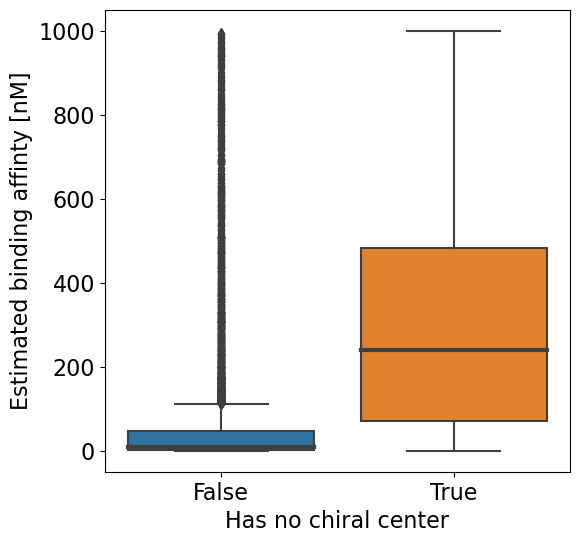

In [30]:
# binding affinity per subpocket
plt.figure(figsize=(6, 6))

sns.boxplot(
x="has_no_chiral_centre",
y='binding_affinity',
data=data_post_filtered,
medianprops={"linewidth": 3, "linestyle": "-"}
)
plt.ylabel("Estimated binding affinty [nM]", fontsize=16)
plt.xlabel("Has no chiral center", fontsize=16)

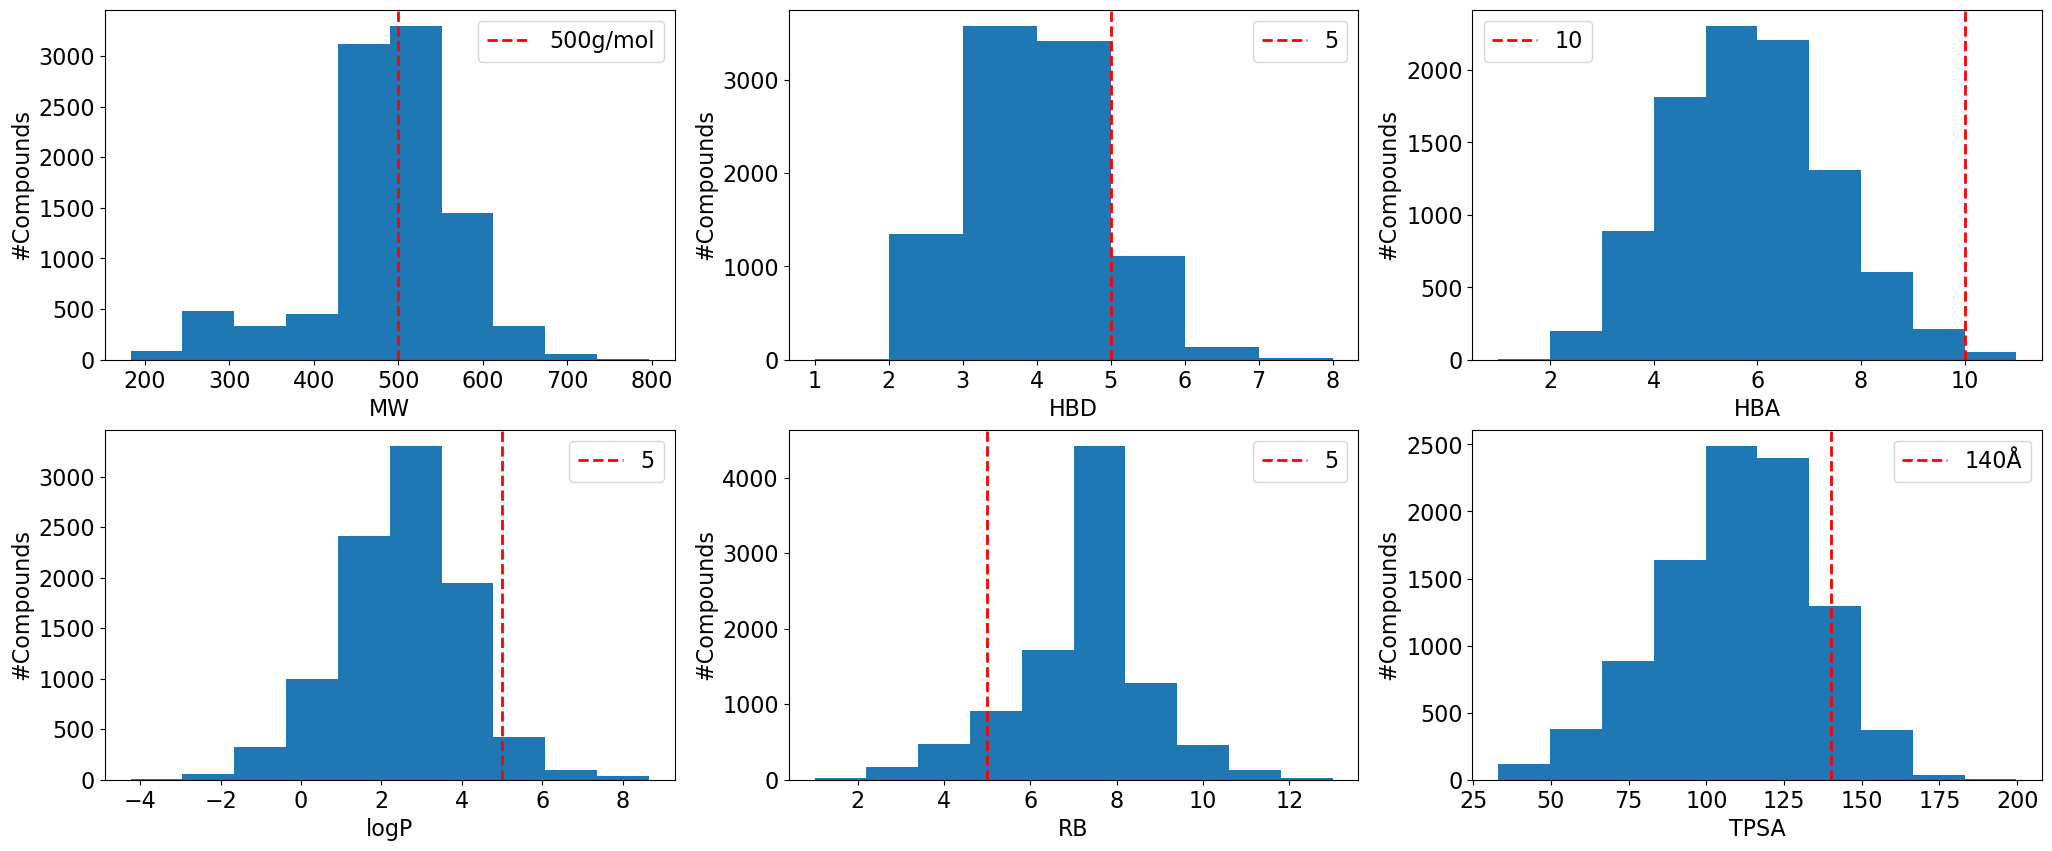

In [12]:
# plot Ro5 properties on reduced data
#plt.figure(figsize=(50, 6))
plt.rc('font', size=16) 
fig, axis = plt.subplots(2, 3)
fig.set_size_inches(25, 10)
descriptors = ['MW', 'HBD', 'HBA', 'logP', 'RB', 'TPSA']
_temp = ['g/mol', '', '', '', '', 'Å']
benchmarks = [500, 5, 10, 5, 5, 140]
for i, descriptor_name in enumerate(descriptors):
        if descriptor_name == 'HBD':
                axis[i // 3, i % 3].hist(data_post_filtered[descriptor_name], bins=7)
        else:
                axis[i // 3, i % 3].hist(data_post_filtered[descriptor_name])
        axis[i // 3, i % 3].set(ylabel="#Compounds", xlabel=descriptor_name)
        line = axis[i // 3, i % 3].axvline(benchmarks[i], color='r', linestyle='dashed', linewidth=2, label = f"{benchmarks[i]}{_temp[i]}")
        axis[i // 3, i % 3].legend(handles = [line], fontsize=16)

In [13]:
print(f'{sum(data_post_filtered["logP"] > 5)} compounds with logP > 5')
print(f'{sum(data_post_filtered["MW"] > 500)} compounds with MW > 500')
print(f'{sum(data_post_filtered["RB"] > 5)} compounds with RB > 5')
print(f'{sum(data_post_filtered["HBD"] > 5)} compounds with HBD > 5')
print(f'{sum(data_post_filtered["HBA"] > 10)} compounds with HBA > 10')
print(f'{sum(data_post_filtered["TPSA"] > 140)} compounds with TPSA > 140')

429 compounds with logP > 5
4520 compounds with MW > 500
8020 compounds with RB > 5
155 compounds with HBD > 5
8 compounds with HBA > 10
1058 compounds with TPSA > 140


In [34]:
# compounds fullfilling Ro5
print(f'{sum(data_post_filtered["Ro5"])} compounds fulfill Ro5')
print(f'{sum(data_post_filtered["Veber"])} compounds fulfill Vebers rule')
print(f'{sum(data_post_filtered[data_post_filtered["Veber"]]["Ro5"])} compounds fulfill Vebers rule & Ro5')

4946 compounds fulfill Ro5
1419 compounds fulfill Vebers rule
1419 compounds fulfill Vebers rule & Ro5


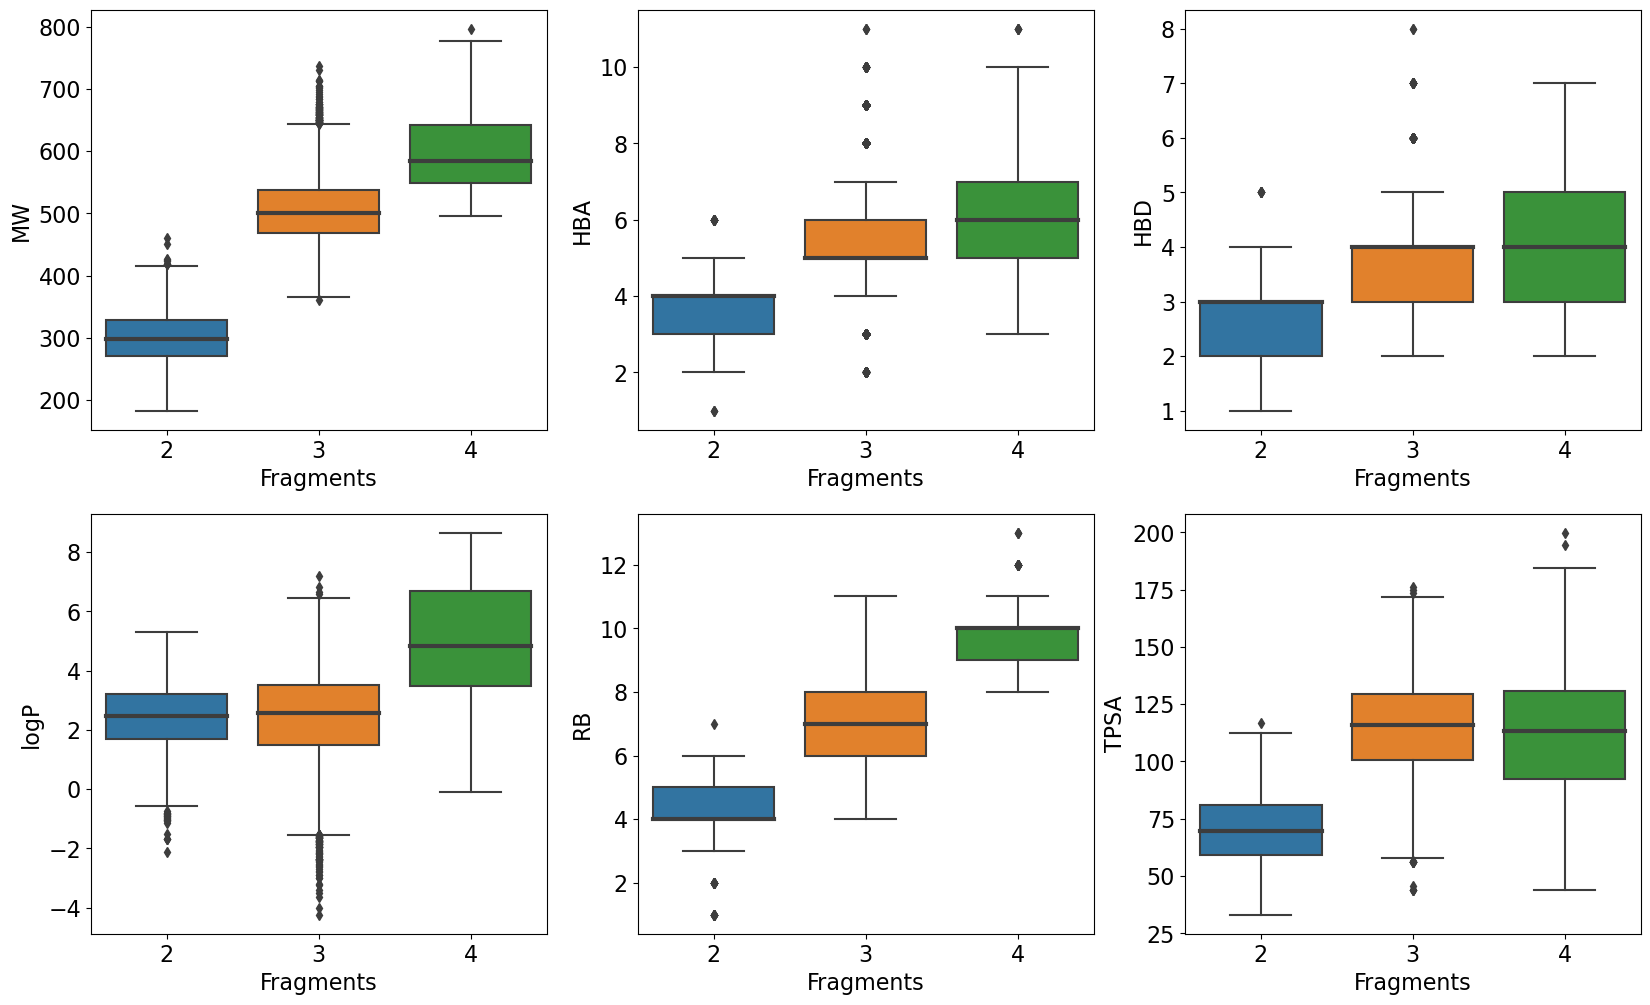

In [36]:
plt.figure(figsize=(20, 12))
descriptors = ['MW', 'HBA', 'HBD', 'logP', 'RB', 'TPSA']
for i, descriptor_name in enumerate(descriptors):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(
        x="num_fragments",
        y=descriptor_name,
        data=data_post_filtered,
        medianprops={"linewidth": 3, "linestyle": "-"},
        )
        plt.ylabel(descriptor_name, fontsize=16)
        plt.xlabel("Fragments", fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

In [37]:
for descriptor_name in range(2, 5):
    x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].logP
    print(f'logP median of compounds with {descriptor_name} fragments:\n{x.mean()}')

logP median of compounds with 2 fragments:
2.3707976536885256
logP median of compounds with 3 fragments:
2.4513755451150483
logP median of compounds with 4 fragments:
4.896581614906836


Text(0.5, 0, 'QED')

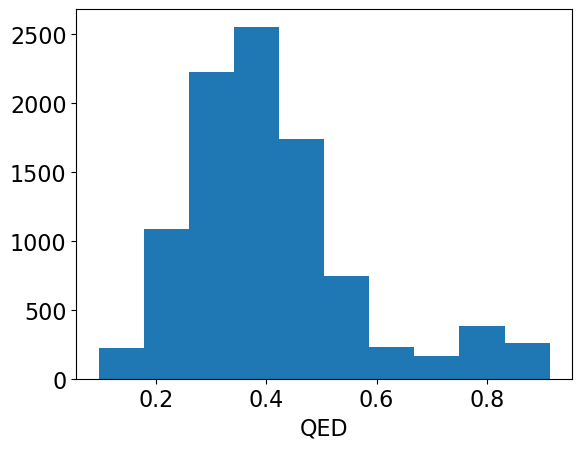

In [38]:
# plot QED
plt.hist(data_post_filtered['QED'])
plt.xlabel('QED')

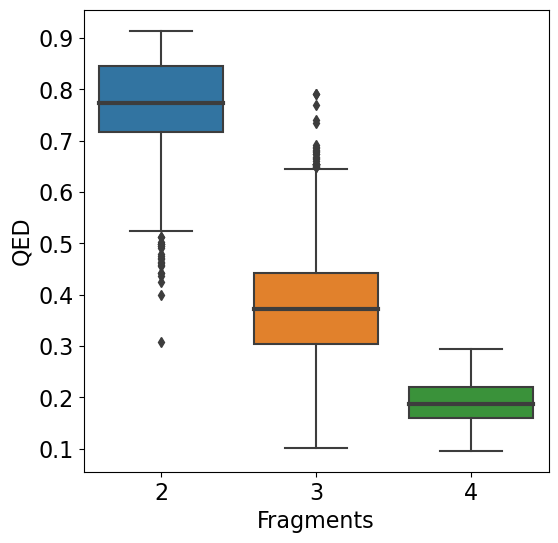

In [39]:
plt.figure(figsize=(6, 6))

descriptors = ['QED']
for i, descriptor_name in enumerate(descriptors):
        plt.subplot(1, 1, i + 1)
        sns.boxplot(
        x="num_fragments",
        y=descriptor_name,
        data=data_post_filtered,
        medianprops={"linewidth": 3, "linestyle": "-"},
        )
        plt.ylabel(descriptor_name, fontsize=16)
        plt.xlabel("Fragments", fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

In [41]:
with Chem.SDWriter('../cluster_results/3amb18092023/3amb/topten.sdf') as w:
  for idx in range(21):
    w.write(data_post_filtered.ROMol[idx])

Top 25 ranked compounds


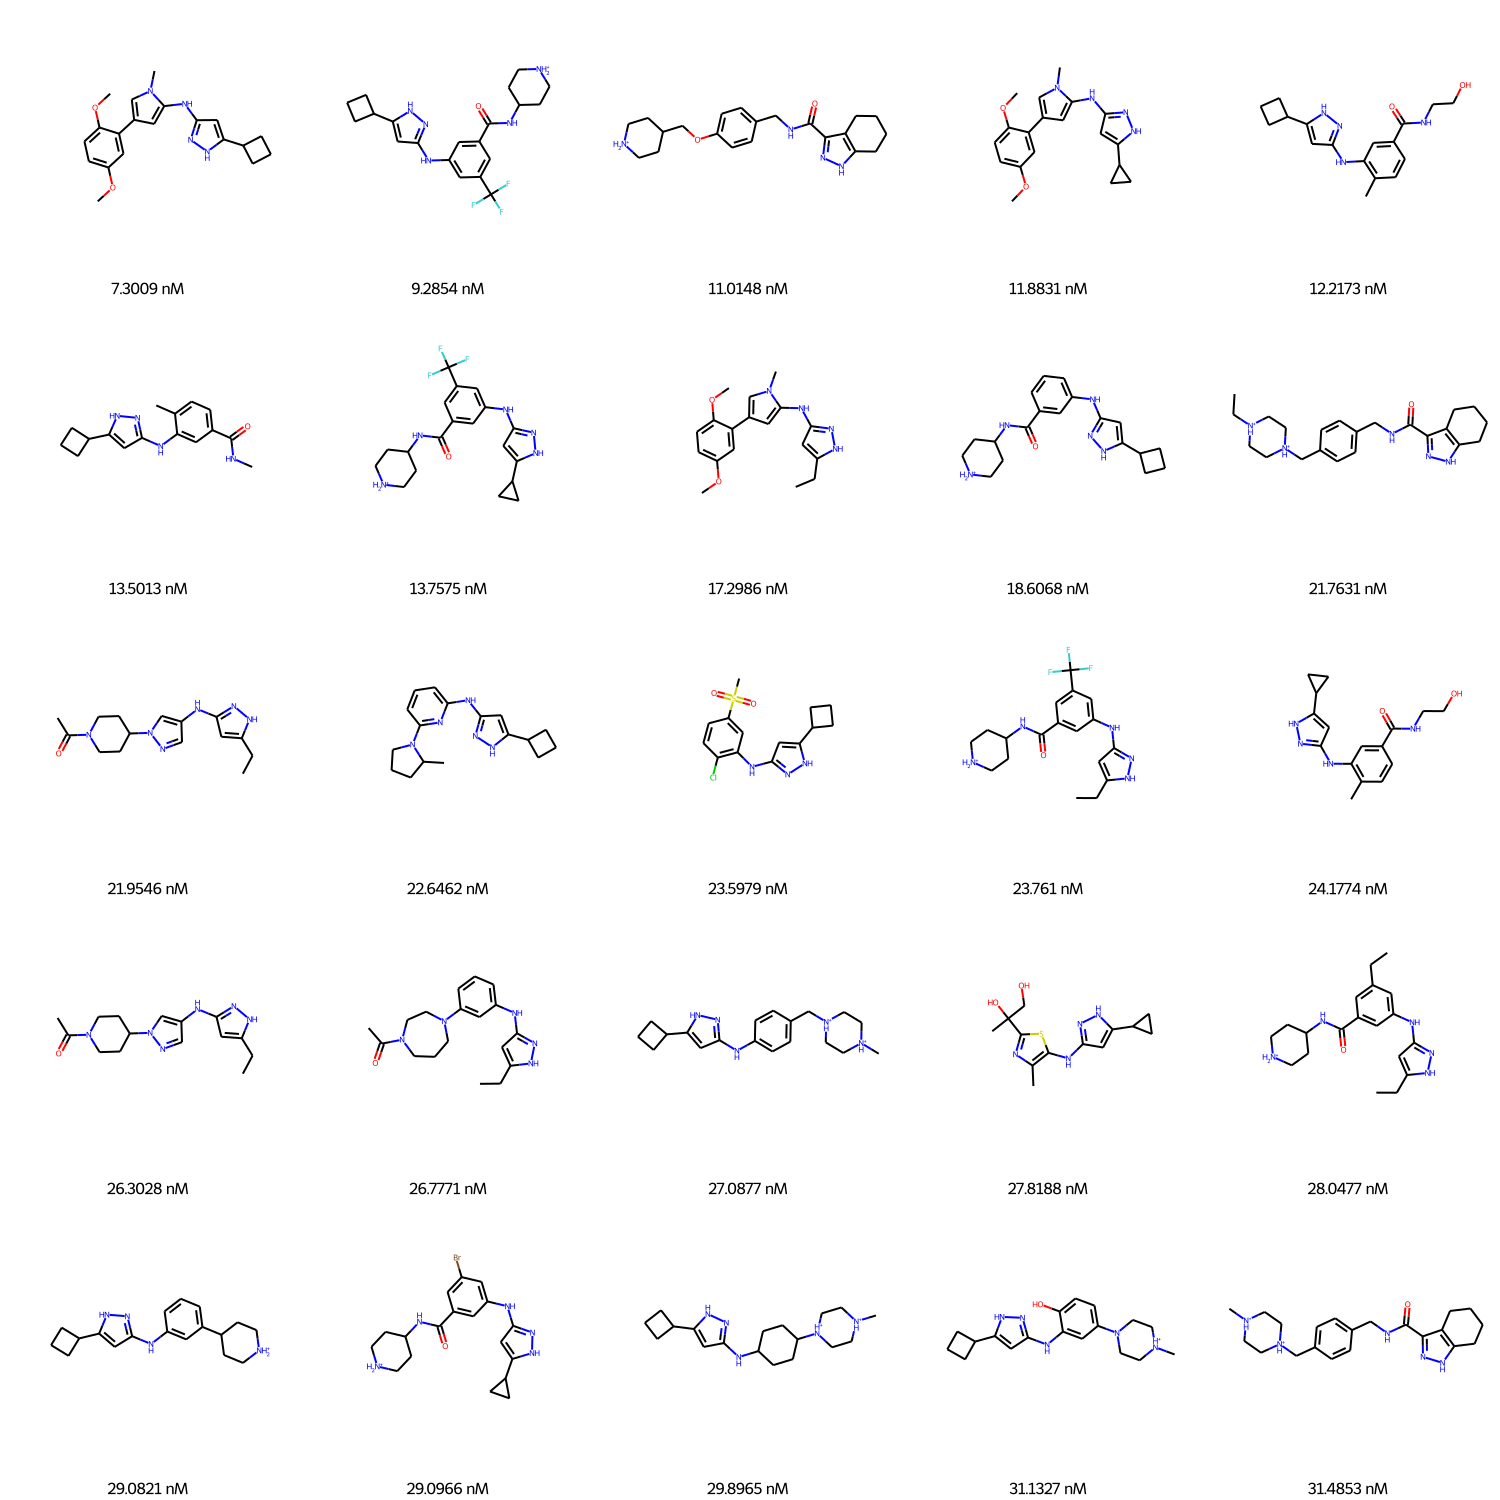

In [42]:
print("Top 25 ranked compounds")
mols = [data_post_filtered.ROMol[idx] for idx in range(25)]
for mol in mols:
    AllChem.Compute2DCoords(mol)
img = Draw.MolsToGridImage(
    mols, 
    legends=[
        f"{round(data_post_filtered['binding_affinity'][idx],4)} nM"  
        for idx in range(50)
    ],  
    molsPerRow=5, 
    maxMols=100,
    subImgSize=(300, 300)
)
img

In [43]:
ro5fulfilled = data_post_filtered[data_post_filtered.Ro5].reset_index(drop=True)
ro5_veber_fulfilled = data_post_filtered[data_post_filtered.Veber].reset_index(drop=True)


Top 25 ranked compounds (fulfilling Ro5 and Vebers rule)


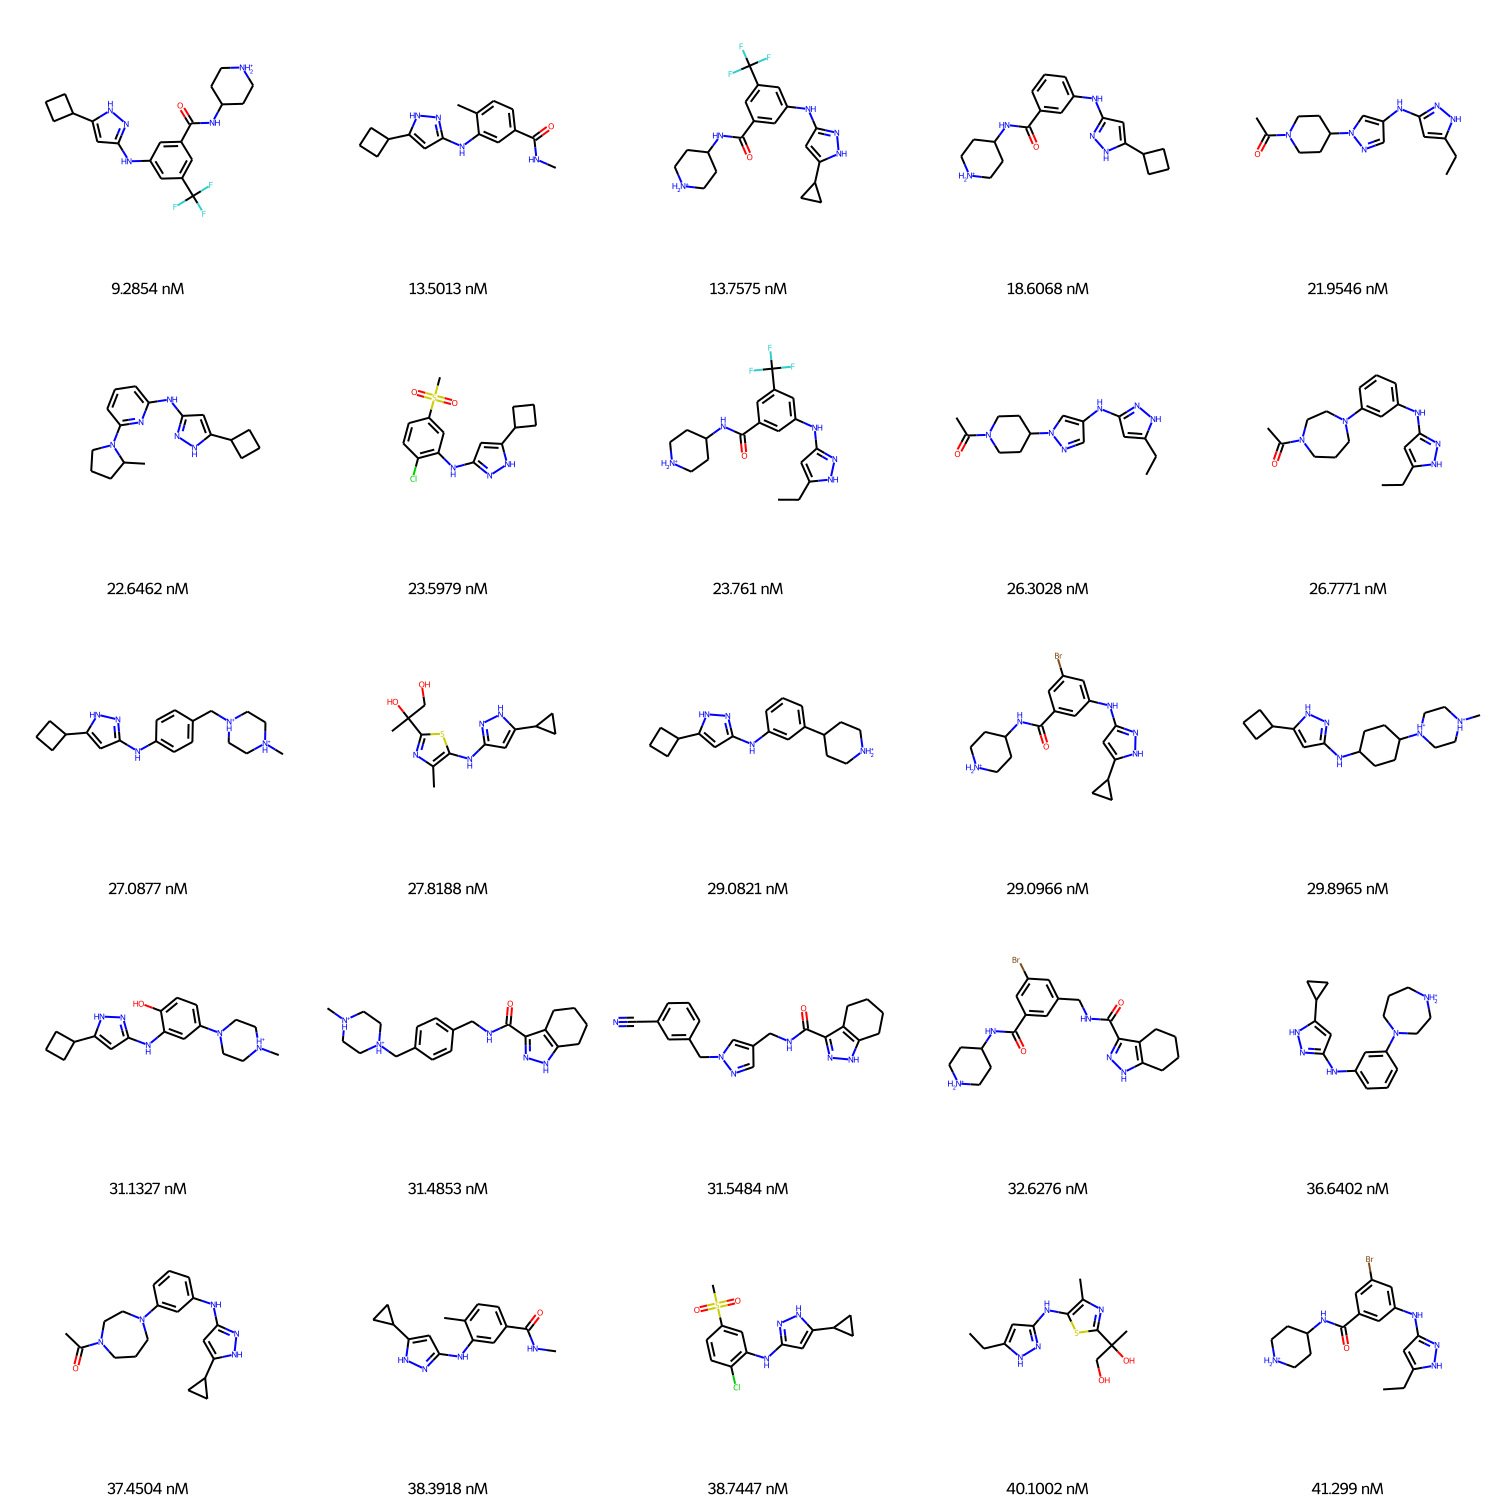

In [44]:
print("Top 25 ranked compounds (fulfilling Ro5 and Vebers rule)")
mols = [ro5_veber_fulfilled.ROMol[idx] for idx in range(25)]
for mol in mols:
    AllChem.Compute2DCoords(mol)
img = Draw.MolsToGridImage(
    mols,  
    molsPerRow=5, 
    legends=[f"{round(ro5_veber_fulfilled['binding_affinity'][idx],4)} nM" for idx in range(25)],
    maxMols=100,
    subImgSize=(300, 300)
)
img